In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the dataset
data = pd.read_csv('framingham.csv')

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
data.shape

(4238, 16)

In [6]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [7]:
data.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

#### Dropping the null valued columns

In [ ]:
# dropping the columns with null values.
data.drop(['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose'],axis=1,inplace=True)

#### Handling the null values 

###### If we have null values in Numerical column we will replace it with mean or median
###### If we have null values in Categorical column we will replace it with mode

In [8]:
data['education'].fillna(data['education'].mean(), inplace=True)
data["cigsPerDay"].fillna(data['cigsPerDay'].mean(),inplace=True)
data["BPMeds"].fillna(data['BPMeds'].mean(),inplace=True)
data["totChol"].fillna(data['totChol'].mean(),inplace=True)
data["BMI"].fillna(data['BMI'].mean(),inplace=True)
data["heartRate"].fillna(data['heartRate'].mean(),inplace=True)
data["glucose"].fillna(data['glucose'].mean(),inplace=True)

In [9]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [11]:
# dividing the data into x and y
x = data.iloc[:,:-1]
y = data['TenYearCHD']

In [12]:
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [13]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

#### Scaling

In [14]:
names = x.columns

In [15]:
names

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scale=MinMaxScaler()

In [18]:
X_scaled=scale.fit_transform(x)

In [19]:
X_scaled

array([[1.        , 0.18421053, 1.        , ..., 0.27702375, 0.36363636,
        0.10451977],
       [0.        , 0.36842105, 0.33333333, ..., 0.31968008, 0.51515152,
        0.10169492],
       [1.        , 0.42105263, 0.        , ..., 0.23751818, 0.31313131,
        0.08474576],
       ...,
       [0.        , 0.42105263, 0.33333333, ..., 0.1565681 , 0.4040404 ,
        0.1299435 ],
       [0.        , 0.31578947, 0.        , ..., 0.08773631, 0.42424242,
        0.11855015],
       [0.        , 0.52631579, 0.33333333, ..., 0.14372273, 0.36363636,
        0.18926554]])

In [20]:
x = pd.DataFrame(X_scaled,columns=names)

In [21]:
x.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119


In [22]:
# Train and test split
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train.shape

(3390, 15)

In [25]:
y_train.shape

(3390,)

In [26]:
# Model Building 
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(random_state=28)

In [28]:
# fitting the model
lr.fit(x_train,y_train)

LogisticRegression(random_state=28)

In [29]:
# Prediction
pred = lr.predict(x_train)
pred1= lr.predict(x_test)

In [30]:
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
accuracy_score(y_train,pred)

0.8572271386430679

In [33]:
accuracy_score(y_test,pred1)

0.8455188679245284

In [34]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       710
           1       1.00      0.05      0.10       138

    accuracy                           0.85       848
   macro avg       0.92      0.53      0.51       848
weighted avg       0.87      0.85      0.78       848



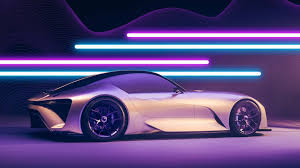

In [36]:
from PIL import Image
from IPython.display import display

img = Image.open('car.jpeg')
display(img)